In [1]:
import geopandas as gpd
from tqdm import tqdm
import pandas as pd
import os
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mi = gpd.GeoDataFrame()

for i in range(1, 41):
    temp_path = f'./TAS_F_Results/{i}/TAS_F_mi.geojson'
    if os.path.exists(temp_path):
        temp_ = gpd.read_file(temp_path)
        mi = pd.concat([mi, temp_], ignore_index=True)
    
mi

,ID,LAT,LON,NAME,LIBRARY_ID,LIBRARY_TYPE,MI_POV150,pval_POV150,MI_UNEMP,pval_UNEMP,...,pval_MUNIT,MI_MOBILE,pval_MOBILE,MI_CROWD,pval_CROWD,MI_NOVEH,pval_NOVEH,MI_GROUPQ,pval_GROUPQ,geometry
0,AL01427,33.458401,-87.356358,JOHN HOLLIS BANKHEAD LOCKS AND DAM,1146,dam_study,0.058115,1.042098e-06,0.025326,1.561821e-02,...,2.356142e-10,0.205076,0.000000e+00,-0.053494,4.101559e-06,0.053489,9.536266e-06,-0.013717,1.304472e-01,POINT (-87.35636 33.45840)
1,AL01432,31.625274,-85.064359,WALTER F. GEORGE LOCK AND DAM,5566,dam_study,-0.034795,1.585941e-09,0.047121,4.440892e-16,...,2.208527e-02,0.095165,0.000000e+00,-0.044194,2.677290e-13,-0.031393,7.726229e-08,0.065337,0.000000e+00,POINT (-85.06436 31.62527)
2,AR00150,34.573008,-93.195012,BLAKELY MOUNTAIN DAM,117,dam_study,-0.186927,1.287553e-84,0.008920,1.689318e-01,...,4.004679e-06,0.037559,4.396346e-05,-0.130393,2.617661e-44,-0.223817,1.510179e-123,0.018283,3.120606e-02,POINT (-93.19501 34.57301)
3,AR00151S001,34.219240,-93.095681,DEGRAY DAM - SADDLE DIKE,1138,dam_study,-0.096510,2.309709e-39,-0.026801,8.508212e-05,...,1.033947e-09,0.074114,0.000000e+00,-0.088793,4.821262e-36,-0.077270,4.485373e-27,0.015134,1.950256e-02,POINT (-93.09568 34.21924)
4,AR00151S002,34.178329,-93.099998,DEGRAY REREGULATING DAM,1075,dam_study,-0.065110,2.810845e-19,-0.015887,1.328245e-02,...,2.950765e-05,0.059274,0.000000e+00,-0.053060,1.784795e-13,-0.068143,6.672299e-22,0.032401,2.803761e-06,POINT (-93.10000 34.17833)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,WV06702,38.222357,-80.890672,SUMMERSVILLE DAM,4062,dam_study,0.027946,2.069314e-07,-0.030825,4.324646e-08,...,0.000000e+00,-0.201060,2.664389e-282,-0.056221,7.868269e-26,0.219170,0.000000e+00,0.086830,0.000000e+00,POINT (-80.89067 38.22236)
375,WV08902,37.640795,-80.886369,BLUESTONE DAM,38,dam_study,-0.079951,3.072404e-63,-0.103365,8.885219e-102,...,0.000000e+00,-0.226888,0.000000e+00,-0.065411,1.458092e-43,0.139276,0.000000e+00,0.066547,0.000000e+00,POINT (-80.88637 37.64079)
376,WV09901,38.144935,-82.384172,EAST LYNN DAM,5452,dam_study,-0.033534,1.952062e-04,-0.028218,9.755078e-04,...,2.991035e-16,0.077446,0.000000e+00,-0.036636,4.364129e-05,0.009548,1.504209e-01,-0.060428,3.296243e-11,POINT (-82.38417 38.14493)
377,WV09903,38.304042,-82.416071,BEECH FORK DAM,4293,dam_study,-0.015188,3.347609e-02,-0.035323,2.771856e-05,...,7.282427e-03,0.008902,1.421198e-01,-0.031063,6.622598e-05,0.003417,3.504198e-01,-0.042401,5.413289e-08,POINT (-82.41607 38.30404)


In [28]:
mi_ = mi[[col for col in mi.columns if col.startswith('MI')]]

for col in mi_.columns:
    mi_ = mi_.loc[pd.notna(mi_[col])]
    
mi_

,MI_POV150,MI_UNEMP,MI_HBURD,MI_NOHSDP,MI_UNINSUR,MI_AGE65,MI_AGE17,MI_DISABL,MI_SNGPNT,MI_LIMENG,MI_MINRTY,MI_MUNIT,MI_MOBILE,MI_CROWD,MI_NOVEH,MI_GROUPQ
0,0.058115,0.025326,-0.065318,0.076166,0.079251,0.115458,-0.022647,0.179648,-0.065471,-0.017105,0.089426,-0.074640,0.205076,-0.053494,0.053489,-0.013717
1,-0.034795,0.047121,-0.059749,0.012894,0.000207,0.074758,-0.113065,0.119959,-0.079143,-0.003747,-0.068454,-0.012511,0.095165,-0.044194,-0.031393,0.065337
2,-0.186927,0.008920,-0.090454,-0.247692,-0.055380,0.017416,-0.168292,0.016629,-0.118823,-0.055407,-0.246028,-0.041531,0.037559,-0.130393,-0.223817,0.018283
3,-0.096510,-0.026801,-0.067281,-0.084564,-0.100911,0.008234,-0.107335,0.093625,-0.052972,-0.023566,-0.106563,-0.045073,0.074114,-0.088793,-0.077270,0.015134
4,-0.065110,-0.015887,-0.024996,-0.032323,-0.011881,-0.015123,-0.005162,0.050569,-0.029691,0.041011,-0.039892,-0.028482,0.059274,-0.053060,-0.068143,0.032401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0.027946,-0.030825,0.079715,-0.092442,0.027476,0.133312,-0.177678,-0.007002,0.099445,0.133385,0.306889,0.137160,-0.201060,-0.056221,0.219170,0.086830
375,-0.079951,-0.103365,0.053645,-0.164010,0.005417,0.098632,-0.134180,-0.124901,0.082853,0.044604,0.234926,0.145067,-0.226888,-0.065411,0.139276,0.066547
376,-0.033534,-0.028218,-0.128998,0.111967,0.002699,0.111718,0.002653,0.063325,-0.152105,-0.061263,-0.088552,-0.074222,0.077446,-0.036636,0.009548,-0.060428
377,-0.015188,-0.035323,-0.044129,0.045472,-0.035462,0.021667,-0.000701,0.023968,-0.044777,-0.022849,-0.021810,-0.020225,0.008902,-0.031063,0.003417,-0.042401


In [79]:
def determine_number_of_cluster(array):
    km_cost = []  # Sum of squared distances of samples to their closest cluster center.
    distortions = []  # the average of the squared distances from the cluster centers of the respective clusters.Typically, the Euclidean distance metric is used.
    km_silhouette = []

    for i in range(2, 11):
        KM = KMeans(n_clusters=i, max_iter=999, n_init = 99, random_state=17)
        KM.fit(array)

        # Calculate Silhouette Scores
        preds = KM.predict(array)
        silhouette = silhouette_score(array, preds)
        km_silhouette.append(silhouette)

    return km_silhouette

determine_number_of_cluster(mi_)

[0.2038511528381645,
 0.14920339716077818,
 0.15811342174298396,
 0.09773895986041833,
 0.1205035139563882,
 0.11059761697191718,
 0.11077972049903023,
 0.12903371508288056,
 0.10335527208723867]

In [66]:
mi_.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            369, 370, 371, 372, 373, 374, 375, 376, 377, 378],
           dtype='int64', length=371)

In [80]:
def kmeans_cluster(array, num_of_cluster):
    kmeans = KMeans(n_clusters=num_of_cluster, max_iter=999, n_init = 99, random_state=17)
    kmeans.fit(array)
    y_kmeans = kmeans.predict(array)
    
    cluster_df = pd.DataFrame({'cluster': y_kmeans}, index=array.index)
    
    return cluster_df

aa = kmeans_cluster(mi_, 4)

In [81]:
group_0 = mi_.loc[aa['cluster'] == 0].stack().reset_index()
group_1 = mi_.loc[aa['cluster'] == 1].stack().reset_index()
group_2 = mi_.loc[aa['cluster'] == 2].stack().reset_index()
group_3 = mi_.loc[aa['cluster'] == 3].stack().reset_index()

In [85]:
len(group_0['level_0'].unique())

49

In [87]:
len(group_1['level_0'].unique())

115

In [88]:
len(group_2['level_0'].unique())

3

In [89]:
len(group_3['level_0'].unique())

204

In [83]:
group_0.shape

(784, 3)

(-0.3, 0.3)

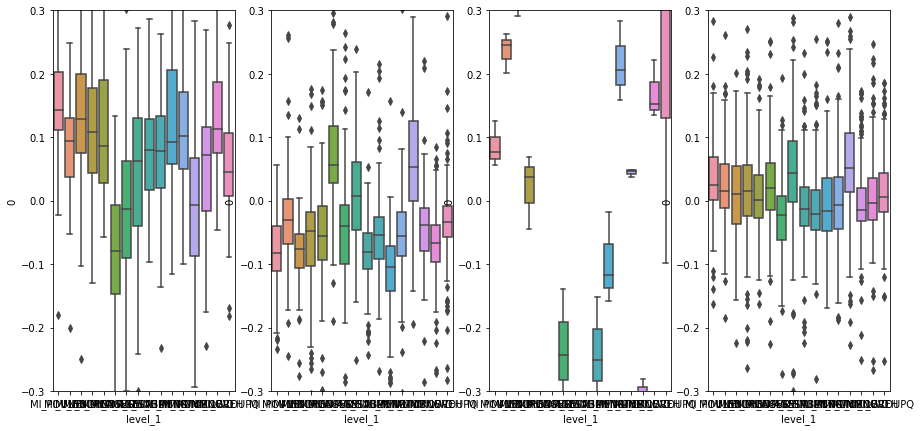

In [90]:
fig, ax = plt.subplots(1, 4, figsize=(15, 7))

sns.boxplot(x = 'level_1', y = 0, data=group_0, ax=ax[0])
sns.boxplot(x = 'level_1', y = 0, data=group_1, ax=ax[1])
sns.boxplot(x = 'level_1', y = 0, data=group_2, ax=ax[2])
sns.boxplot(x = 'level_1', y = 0, data=group_3, ax=ax[3])


ax[0].set_ylim(-0.3, 0.3)
ax[1].set_ylim(-0.3, 0.3)
ax[2].set_ylim(-0.3, 0.3)
ax[3].set_ylim(-0.3, 0.3)